In [76]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

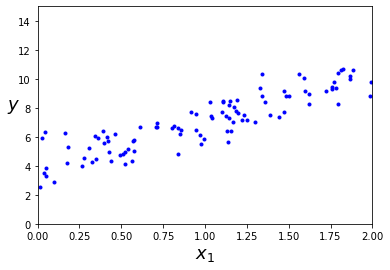

In [77]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [78]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
Xb_length = len(X_b)

In [79]:
X_b

array([[1.        , 1.75920299],
       [1.        , 1.81408392],
       [1.        , 1.98306555],
       [1.        , 0.41663078],
       [1.        , 0.71087867],
       [1.        , 1.33843806],
       [1.        , 0.96760508],
       [1.        , 0.83677907],
       [1.        , 0.7156225 ],
       [1.        , 1.18756126],
       [1.        , 1.15118686],
       [1.        , 0.32291567],
       [1.        , 0.94347968],
       [1.        , 1.10694355],
       [1.        , 1.14057388],
       [1.        , 0.42021439],
       [1.        , 1.48454278],
       [1.        , 0.05039819],
       [1.        , 0.70966371],
       [1.        , 1.5604253 ],
       [1.        , 1.12778584],
       [1.        , 0.52232487],
       [1.        , 1.38990624],
       [1.        , 1.13478189],
       [1.        , 1.59248722],
       [1.        , 1.47005037],
       [1.        , 1.22021584],
       [1.        , 0.97635535],
       [1.        , 0.26636425],
       [1.        , 0.52266604],
       [1.

In [80]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.91439158],
       [3.17649356]])

In [81]:
f = lambda x: theta_best[0] + x * theta_best[1]
X_new = np.arange(np.min(X),np.max(X),0.01)
y_predict = f(X_new)

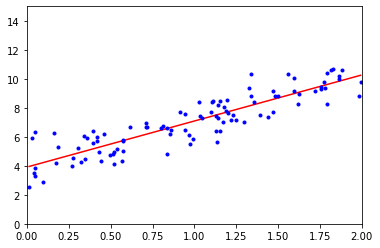

In [82]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

In [83]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
reg.coef_


array([[3.17649356]])

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [84]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0


In [85]:
theta_path_bgd.append(np.copy(theta))
for _ in range(n_iterations):
    grad = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * grad
    theta_path_bgd.append(np.copy(theta))
theta

array([[3.91439158],
       [3.17649356]])

# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [86]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [87]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.copy(theta_0)
theta.T.dot(X_b[0])-y[0]

array([0.22469291])

In [88]:
theta_path_sgd.append(np.copy(theta))
for _ in range(n_iterations):
    rand_index = np.random.randint(0,Xb_length-1)
    grad = 2 / m * X_b[rand_index][0]*(theta.T.dot(X_b[rand_index]) - y[rand_index])
    theta -= eta * grad
    theta_path_sgd.append(np.copy(theta))
theta

array([[3.90098019],
       [3.16308217]])

# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [89]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = np.copy(theta_0)

In [90]:
theta_path_mgd.append(np.copy(theta))
number_of_rows = X_b.shape[0]
for _ in range(n_iterations):
    random_indices = np.random.choice(number_of_rows, size=minibatch_size, replace=False)
    X_b_batch = X_b[random_indices,:]
    grad = 2 / m * X_b_batch.T.dot(X_b_batch.dot(theta) - y[random_indices])
    theta -= eta * grad
    theta_path_mgd.append(np.copy(theta))
        # grad = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
theta

array([[3.90463161],
       [3.15813259]])

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [91]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

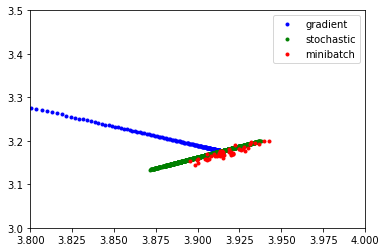

In [96]:
plt.xlim([3.8,4.0])
plt.ylim([3,3.5])
plt.plot(theta_path_bgd[:,0,0],theta_path_bgd[:,1,0],'b.',label='gradient')
plt.plot(theta_path_sgd[:,0,0],theta_path_sgd[:,1,0],'g.',label='stochastic')
plt.plot(theta_path_mgd[:,0,0],theta_path_mgd[:,1,0],'r.',label='minibatch')
plt.legend()
plt.show()